In [1]:
using Pkg
Pkg.activate("..") # activate BurgersJoint environment
Pkg.instantiate() # install all dependencies if necessary
using BurgersJoint
using BurgersJoint.BurgersEquation
using BurgersJoint.FiniteDifference
using Plots

  Activating project at `~/Documents/ACFPD/Individual assignment/BurgersJoint`
┌ Warning: HSA runtime is unavailable, compilation and runtime functionality will be disabled.
└ @ AMDGPU ~/.julia/packages/AMDGPU/EcH58/src/AMDGPU.jl:168
┌ Warning: HIP library is unavailable, HIP integration will be disabled.
└ @ AMDGPU ~/.julia/packages/AMDGPU/EcH58/src/AMDGPU.jl:195
┌ Warning: rocBLAS is unavailable, functionality will be disabled.
└ @ AMDGPU ~/.julia/packages/AMDGPU/EcH58/src/AMDGPU.jl:206
┌ Warning: rocSPARSE is unavailable, functionality will be disabled.
└ @ AMDGPU ~/.julia/packages/AMDGPU/EcH58/src/AMDGPU.jl:206
┌ Warning: rocSOLVER is unavailable, functionality will be disabled.
└ @ AMDGPU ~/.julia/packages/AMDGPU/EcH58/src/AMDGPU.jl:206
┌ Warning: rocRAND is unavailable, functionality will be disabled.
└ @ AMDGPU ~/.julia/packages/AMDGPU/EcH58/src/AMDGPU.jl:206
┌ Warning: rocFFT is unavailable, functionality will be disabled.
└ @ AMDGPU ~/.julia/packages/AMDGPU/EcH58/src/AMDGPU.jl

In [2]:
# Parameter choices:
N   = 64    # number of grid points
dt   = 5e-4/pi   # time step
T = 3/pi    # final time
nu  = 1e-2/pi # viscosity

x, u_final, tvec, history = solveFiniteDifference(N;dt=dt, T=T, nu=nu)

println("Simulation complete!")
println("Final time = ", tvec[end])

Simulation complete!
Final time = 0.9547705036082802


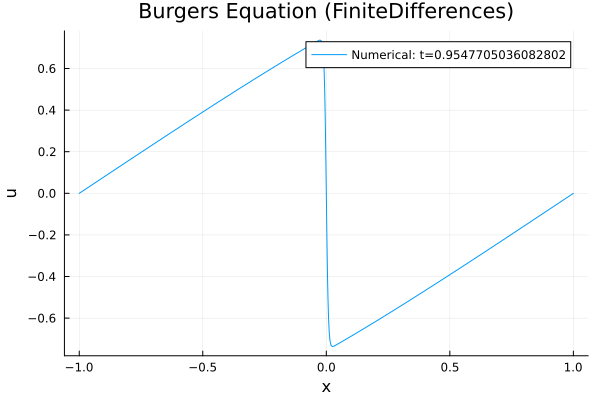

In [5]:
plt = plot(x, u_final, label="Numerical: t=$(tvec[end])", xlabel="x", ylabel="u", 
           title="Burgers Equation (FiniteDifferences)")
#plot!(plt, x, analytical_solution(x, tvec[end]; nu=nu), label="Analytical: t=$(tvec[end])", 
#      linestyle=:dash)
display(plt)

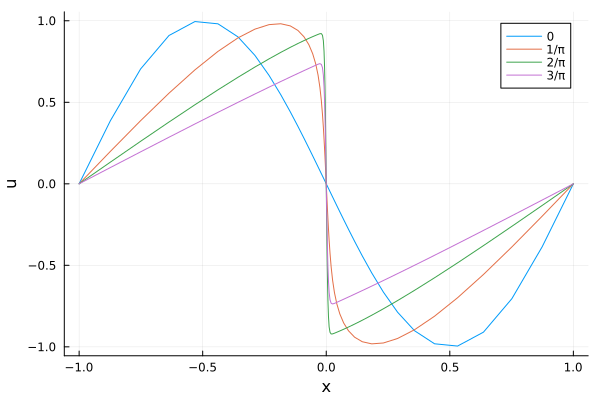

In [4]:
times_to_plot = 0:1/pi:T

plt = plot()
for (idx, t) in enumerate(times_to_plot)
    current_label = idx == 1 ? "0" : "$(idx-1)/π"
    plot!(plt, x, history[idx], label=current_label)
end
plot!(plt, xlabel="x", ylabel="u")
display(plt)